# Project 5: Football Analytics

We are Javier Alvarez and Carlos Azagra.

We are super fans not only of football but also at playing at it in videogames. We are very interested in interpretate football information with all the technical knowledge learnt during the course, and we found a dataset with big tons of stats about the most famous football videogame in the history: FIFA.

This dataset combines real data from football players (name, shirt number, teams, salaries, biological information...) and virtual data (subjective data such as rating and skills) that we will use to analyse certain statements or predetermined ideas that we, the fans of football, have, and compare them to real data.

Moreover, we have obtained data from a website about real stats of some of the players from the FIFA dataset in the real life, that we think can help us to test if the virtual data fits or matches real performance of the players.

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import cufflinks as cf
import ipywidgets as widgets
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway
from ipywidgets import interact
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fifa_players.csv', encoding='utf-8')

In [3]:
for i in range(len(df.columns)):
    display(df.columns[i])

'Anexar1[sofifa_id]'

'Anexar1[Año]'

'Anexar1[short_name]'

'Anexar1[long_name]'

'Anexar1[age]'

'Anexar1[dob]'

'Anexar1[height_cm]'

'Anexar1[weight_kg]'

'Anexar1[nationality]'

'Anexar1[club_name]'

'Anexar1[league_name]'

'Anexar1[league_rank]'

'Anexar1[overall]'

'Anexar1[potential]'

'Anexar1[value_eur]'

'Anexar1[wage_eur]'

'Anexar1[player_positions]'

'Anexar1[preferred_foot]'

'Anexar1[international_reputation]'

'Anexar1[weak_foot]'

'Anexar1[skill_moves]'

'Anexar1[work_rate]'

'Anexar1[body_type]'

'Anexar1[real_face]'

'Anexar1[release_clause_eur]'

'Anexar1[player_tags]'

'Anexar1[team_position]'

'Anexar1[team_jersey_number]'

'Anexar1[loaned_from]'

'Anexar1[joined]'

'Anexar1[contract_valid_until]'

'Anexar1[nation_position]'

'Anexar1[nation_jersey_number]'

'Anexar1[pace]'

'Anexar1[shooting]'

'Anexar1[passing]'

'Anexar1[dribbling]'

'Anexar1[defending]'

'Anexar1[physic]'

'Anexar1[gk_diving]'

'Anexar1[gk_handling]'

'Anexar1[gk_kicking]'

'Anexar1[gk_reflexes]'

'Anexar1[gk_speed]'

'Anexar1[gk_positioning]'

'Anexar1[player_traits]'

'Anexar1[attacking_crossing]'

'Anexar1[attacking_finishing]'

'Anexar1[attacking_heading_accuracy]'

'Anexar1[attacking_short_passing]'

'Anexar1[attacking_volleys]'

'Anexar1[skill_dribbling]'

'Anexar1[skill_curve]'

'Anexar1[skill_fk_accuracy]'

'Anexar1[skill_long_passing]'

'Anexar1[skill_ball_control]'

'Anexar1[movement_acceleration]'

'Anexar1[movement_sprint_speed]'

'Anexar1[movement_agility]'

'Anexar1[movement_reactions]'

'Anexar1[movement_balance]'

'Anexar1[power_shot_power]'

'Anexar1[power_jumping]'

'Anexar1[power_stamina]'

'Anexar1[power_strength]'

'Anexar1[power_long_shots]'

'Anexar1[mentality_aggression]'

'Anexar1[mentality_interceptions]'

'Anexar1[mentality_positioning]'

'Anexar1[mentality_vision]'

'Anexar1[mentality_penalties]'

'Anexar1[mentality_composure]'

'Anexar1[defending_marking]'

'Anexar1[defending_standing_tackle]'

'Anexar1[defending_sliding_tackle]'

'Anexar1[goalkeeping_diving]'

'Anexar1[goalkeeping_handling]'

'Anexar1[goalkeeping_kicking]'

'Anexar1[goalkeeping_positioning]'

'Anexar1[goalkeeping_reflexes]'

'Anexar1[ls]'

'Anexar1[st]'

'Anexar1[rs]'

'Anexar1[lw]'

'Anexar1[lf]'

'Anexar1[cf]'

'Anexar1[rf]'

'Anexar1[rw]'

'Anexar1[lam]'

'Anexar1[cam]'

'Anexar1[ram]'

'Anexar1[lm]'

'Anexar1[lcm]'

'Anexar1[cm]'

'Anexar1[rcm]'

'Anexar1[rm]'

'Anexar1[lwb]'

'Anexar1[ldm]'

'Anexar1[cdm]'

'Anexar1[rdm]'

'Anexar1[rwb]'

'Anexar1[lb]'

'Anexar1[lcb]'

'Anexar1[cb]'

'Anexar1[rcb]'

'Anexar1[rb]'

In [4]:
df2 = pd.read_csv('fifa_sofascore.csv', encoding='utf-8')

In [5]:
for i in range(len(df2.columns)):
    display(df2.columns[i])

'TotalCombinado[IdFifa]'

'TotalCombinado[Año]'

'TotalCombinado[Nombre]'

'TotalCombinado[NombreLargo]'

'TotalCombinado[Edad]'

'TotalCombinado[Fecha de Nacimiento]'

'TotalCombinado[Altura]'

'TotalCombinado[Peso]'

'TotalCombinado[Nacionalidad]'

'TotalCombinado[Club]'

'TotalCombinado[Liga]'

'TotalCombinado[RankingLiga]'

'TotalCombinado[PuntuaciónTotal]'

'TotalCombinado[Potencial]'

'TotalCombinado[Valor (€)]'

'TotalCombinado[Salario (€)]'

'TotalCombinado[Posiciones]'

'TotalCombinado[Pie]'

'TotalCombinado[ReputaciónInternacional]'

'TotalCombinado[PosiciónEquipo]'

'TotalCombinado[DorsalClub]'

'TotalCombinado[FechaFinContrato]'

'TotalCombinado[PosiciónSelección]'

'TotalCombinado[Ritmo]'

'TotalCombinado[Tiro]'

'TotalCombinado[Pase]'

'TotalCombinado[Regate]'

'TotalCombinado[Defensa]'

'TotalCombinado[Fisico]'

'TotalCombinado[gk_diving]'

'TotalCombinado[gk_handling]'

'TotalCombinado[gk_kicking]'

'TotalCombinado[gk_reflexes]'

'TotalCombinado[gk_speed]'

'TotalCombinado[gk_positioning]'

'TotalCombinado[FifaScore.Note]'

'TotalCombinado[FifaScore.Total_Games]'

'TotalCombinado[FifaScore.Total_Goals]'

'TotalCombinado[FifaScore.Total_Assists]'

'TotalCombinado[FifaScore.Average_Touches]'

'TotalCombinado[FifaScore.Average_Big_chances]'

'TotalCombinado[FifaScore.Average_Key_passes]'

'TotalCombinado[FifaScore.Average_Interceptions]'

'TotalCombinado[FifaScore.Average_Duels_won]'

'TotalCombinado[GrupoPosicion]'

In [6]:
df3 = pd.read_csv('CombinadoGrupo.csv', encoding='utf-8')

In [7]:
for i in range(len(df3.columns)):
    display(df3.columns[i])

'Union[IdFifa]'

'Union[Año]'

'Union[Nombre]'

'Union[NombreLargo]'

'Union[Edad]'

'Union[Fecha de Nacimiento]'

'Union[Altura]'

'Union[Peso]'

'Union[Nacionalidad]'

'Union[Club]'

'Union[Liga]'

'Union[RankingLiga]'

'Union[PuntuaciónTotal]'

'Union[Potencial]'

'Union[Valor (€)]'

'Union[Salario (€)]'

'Union[Posiciones]'

'Union[Pie]'

'Union[ReputaciónInternacional]'

'Union[Habilidad PIe Débil]'

'Union[Skills]'

'Union[WorkRate]'

'Union[TipoCuerpo]'

'Union[real_face]'

'Union[Clausula]'

'Union[player_tags]'

'Union[PosiciónEquipo]'

'Union[DorsalClub]'

'Union[loaned_from]'

'Union[joined]'

'Union[FechaFinContrato]'

'Union[PosiciónSelección]'

'Union[DorsalSelección]'

'Union[Ritmo]'

'Union[Tiro]'

'Union[Pase]'

'Union[Regate]'

'Union[Defensa]'

'Union[Fisico]'

'Union[gk_diving]'

'Union[gk_handling]'

'Union[gk_kicking]'

'Union[gk_reflexes]'

'Union[gk_speed]'

'Union[gk_positioning]'

'Union[player_traits]'

'Union[attacking_crossing]'

'Union[attacking_finishing]'

'Union[attacking_heading_accuracy]'

'Union[attacking_short_passing]'

'Union[attacking_volleys]'

'Union[skill_dribbling]'

'Union[skill_curve]'

'Union[skill_fk_accuracy]'

'Union[skill_long_passing]'

'Union[skill_ball_control]'

'Union[movement_acceleration]'

'Union[movement_sprint_speed]'

'Union[movement_agility]'

'Union[movement_reactions]'

'Union[movement_balance]'

'Union[power_shot_power]'

'Union[power_jumping]'

'Union[power_stamina]'

'Union[power_strength]'

'Union[power_long_shots]'

'Union[mentality_aggression]'

'Union[mentality_interceptions]'

'Union[mentality_positioning]'

'Union[mentality_vision]'

'Union[mentality_penalties]'

'Union[mentality_composure]'

'Union[defending_marking]'

'Union[defending_standing_tackle]'

'Union[defending_sliding_tackle]'

'Union[goalkeeping_diving]'

'Union[goalkeeping_handling]'

'Union[goalkeeping_kicking]'

'Union[goalkeeping_positioning]'

'Union[goalkeeping_reflexes]'

'Union[ls]'

'Union[st]'

'Union[rs]'

'Union[lw]'

'Union[lf]'

'Union[cf]'

'Union[rf]'

'Union[rw]'

'Union[lam]'

'Union[cam]'

'Union[ram]'

'Union[lm]'

'Union[lcm]'

'Union[cm]'

'Union[rcm]'

'Union[rm]'

'Union[lwb]'

'Union[ldm]'

'Union[cdm]'

'Union[rdm]'

'Union[rwb]'

'Union[lb]'

'Union[lcb]'

'Union[cb]'

'Union[rcb]'

'Union[rb]'

'Union[Posiciones (grupos)]'

'Union[GrupoPosicion2]'

## Player Number

Almost all of the football fans have dreamed of becoming the number 10 of their beloved team.

The player who wears the jersey with the number **10** uses to be the **VIP** of the team. The number is related to a set of skills that makes this person not only a **relevant player** for the team but also a very important **economic asset**.

Could we determine that the number is somehow correlated with a **performance** variable such as the **Overall rate** of the player, or correlated to **economic** variables such as the **Value** of the player, the **Wage** of the Player or the **International** reputation of the player? 

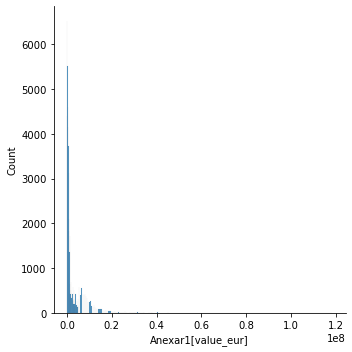

In [8]:
# Distribution of Value of Players

_=sns.displot(df, x='Anexar1[value_eur]', bins=1000)

In [9]:
# Normal test of Value of Players

stats.normaltest(df['Anexar1[value_eur]'])

NormaltestResult(statistic=68908.51896798763, pvalue=0.0)

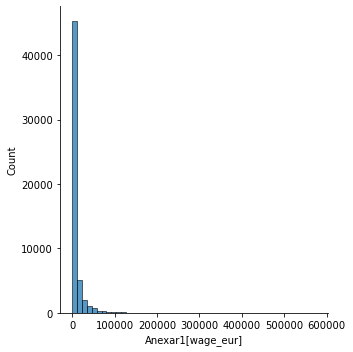

In [10]:
# Distribution of Wages

_=sns.displot(df, x='Anexar1[wage_eur]', bins=50)

In [11]:
# Distribution of Wages

stats.normaltest(df['Anexar1[wage_eur]'])

NormaltestResult(statistic=75757.55413916142, pvalue=0.0)

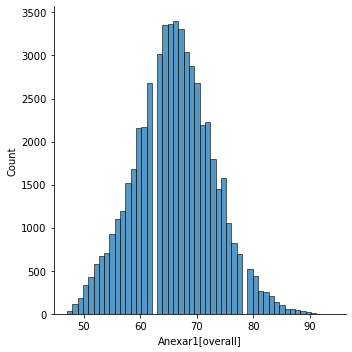

In [12]:
# Distribution of Overall

_=sns.displot(df, x='Anexar1[overall]', bins=50)

In [13]:
# Distribution of Overall

stats.normaltest(df['Anexar1[overall]'])

NormaltestResult(statistic=52.840875717550475, pvalue=3.355441166981189e-12)

In [14]:
# Skew close to 0

stats.skew(df['Anexar1[overall]'])

0.07391440622497336

In [15]:
# Kurtosis close to 0

stats.kurtosis(df['Anexar1[overall]'])

0.0325201895530145

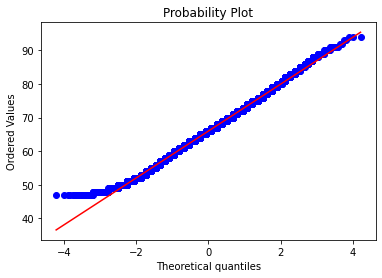

In [38]:
# QQ plot

_ = stats.probplot(df['Anexar1[overall]'], plot=plt)

In [16]:
df_number = pd.concat([df.groupby('Anexar1[team_jersey_number]')['Anexar1[age]'].count() , 
df.groupby('Anexar1[team_jersey_number]')['Anexar1[international_reputation]', 'Anexar1[overall]', 'Anexar1[value_eur]', 'Anexar1[wage_eur]'].mean()], axis=1)

In [17]:
df_number2 = df_number[df_number['Anexar1[age]'] > 99].reset_index()

In [18]:
@ interact(size = df_number2.columns[3:6],y = df_number2.columns[3:6] ,m_whitneyu =['No', 'Yes'])
def number_shirt (y, size, m_whitneyu):
    if m_whitneyu == 'No':
        return px.scatter( df_number2, x='Anexar1[international_reputation]', y=y, hover_name="Anexar1[team_jersey_number]", marginal_y='box', size=size,
                      labels = {'Anexar1[international_reputation]':'Player_Reputation', 'Anexar1[overall]': 
                                'Player_Rate', 'Anexar1[value_eur]':'Player_Value', 'Anexar1[wage_eur]' : 'Player_Wage'},
                      title = 'Influence of Number in economic parameters', size_max= 15, width = 900, height= 500)

    if m_whitneyu == 'Yes':
        wage_10 = df[df['Anexar1[team_jersey_number]'] == 10][y]
        wage_not_10 = df[df['Anexar1[team_jersey_number]'] != 10][y]
        _, p_value = stats.mannwhitneyu(wage_10, wage_not_10)
        display(f'Mannwhitneyu Test p value is {p_value}. We reject the Null hypothesis that the two populations are the same ')
        #display(sns.distplot(wage_10), sns.distplot(wage_not_10))
        return px.scatter( df_number2, x='Anexar1[international_reputation]', y=y, hover_name="Anexar1[team_jersey_number]", marginal_y='box',size=size,
                      labels = {'Anexar1[international_reputation]':'Player_Reputation', 'Anexar1[overall]': 
                                'Player_Rate', 'Anexar1[value_eur]':'Player_Value', 'Anexar1[wage_eur]' : 'Player_Wage'},
                      title = 'Influence of Number in economic parameters', size_max= 15, width = 900, height= 500)

interactive(children=(Dropdown(description='y', options=('Anexar1[overall]', 'Anexar1[value_eur]', 'Anexar1[wa…

In [19]:
@ interact(y = df_number2.columns[3:6])
def number_shirt (y):
    wage_10 = df[df['Anexar1[team_jersey_number]'] == 10][y]
    wage_not_10 = df[df['Anexar1[team_jersey_number]'] != 10][y]
    fig,ax=plt.subplots(figsize=(14,7))
    _= sns.distplot(wage_10)
    _=sns.distplot(wage_not_10)
    

interactive(children=(Dropdown(description='y', options=('Anexar1[overall]', 'Anexar1[value_eur]', 'Anexar1[wa…

In [20]:
df2_ = df2[df2['TotalCombinado[Año]'] == '1/1/2021']

In [21]:
df2_.loc[850, 'TotalCombinado[FifaScore.Total_Goals]'] = 0
df2_.loc[848, 'TotalCombinado[FifaScore.Total_Goals]'] = 0
df2_.loc[836, 'TotalCombinado[FifaScore.Total_Goals]'] = 1
df2_.loc[850, 'TotalCombinado[FifaScore.Total_Assists]'] = 0
df2_.loc[848, 'TotalCombinado[FifaScore.Total_Assists]'] = 0
df2_.loc[836, 'TotalCombinado[FifaScore.Total_Assists]'] = 0

In [22]:
df2_number = pd.concat([df2_.groupby('TotalCombinado[DorsalClub]')['TotalCombinado[Edad]'].count() , 
df2_.groupby('TotalCombinado[DorsalClub]')['TotalCombinado[FifaScore.Total_Games]',
'TotalCombinado[FifaScore.Total_Goals]',
'TotalCombinado[FifaScore.Total_Assists]',
'TotalCombinado[FifaScore.Average_Touches]',
'TotalCombinado[FifaScore.Average_Big_chances]',
'TotalCombinado[FifaScore.Average_Key_passes]'].mean()], axis=1)

In [23]:
df2_number2 = df2_number[df2_number['TotalCombinado[Edad]'] > 7].reset_index()

In [24]:
@ interact(y = pd.concat([df2_number2.iloc[:,0:1], df2_number2.iloc[:,2:8]], axis=1).columns[2:9], description='Game parameter')
def number_shirt (y):
    return px.bar( df2_number2, x='TotalCombinado[DorsalClub]', y=y, hover_name='TotalCombinado[DorsalClub]', 
                      labels = {'TotalCombinado[FifaScore.Total_Games]':'Total_Games', 'TotalCombinado[FifaScore.Total_Goals]': 
                                'Total_Goals', 'TotalCombinado[FifaScore.Total_Assists]':'Total_Assists',
                                'TotalCombinado[FifaScore.Average_Touches]' : 'Average_Touches', 'TotalCombinado[FifaScore.Average_Big_Chances]'
                               : 'Big_chances', 'TotalCombinado[FifaScore.Average_Key_passes]' : 'Key_passes'},
                      title = 'Influence on Number in Game parameters',  width = 900, height= 500)

interactive(children=(Dropdown(description='y', options=('TotalCombinado[FifaScore.Total_Goals]', 'TotalCombin…

## Skills

Football is considered one of the most complicated sports. It requires to have not only outstanding athletic conditions such as strength, power and balance, but also mental agility, motivation and focus or technical conditions like accuracy and coordination.

FIFA divides the skills of the players into 5 main groups: **Pace**, **Passing**, **Dribbling**, **Defending** and **Physic**

There is a say in Football... **What matter is that the balls gets into the goal**.

Would it be True?

In [25]:
df_skills = pd.concat([df.iloc[:,12:13], df.iloc[:,33:39]], axis=1)

In [26]:
df2_skills = pd.concat([df2_['TotalCombinado[FifaScore.Note]'],df2_.iloc[:, 23:29]], axis=1).dropna()

In [27]:
@ interact(Rate = ['Fifa', 'SofaScore'] , x = widgets.SelectMultiple(
    options=['0-Overall', '1-Pace', '2-Shooting','3-Passing','4-Dribbling','5-Defending','6-Physic'],
    description='Skills',
    disabled=False,
))
def skills_func(x, Rate):
    if Rate == 'Fifa':
        a = list(x)
        if len(x) == 2:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            df_skills2 = pd.DataFrame(zip(df_skills.iloc[:,int(z)], df_skills.iloc[:,int(d)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)

        if len(x) == 3:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            e = a[2]
            f = e.split('-')[0]
            df_skills2 = pd.DataFrame(zip(df_skills.iloc[:,int(z)], df_skills.iloc[:,int(d)], df_skills.iloc[:,int(f)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)

        if len(x) == 4:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            e = a[2]
            f = e.split('-')[0]
            g = a[3]
            h = g.split('-')[0]
            df_skills2 = pd.DataFrame(zip(df_skills.iloc[:,int(z)], df_skills.iloc[:,int(d)], df_skills.iloc[:,int(f)], df_skills.iloc[:,int(h)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)

        if len(x) == 5:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            e = a[2]
            f = e.split('-')[0]
            g = a[3]
            h = g.split('-')[0]
            i = a[4]
            j = i.split('-')[0]
            df_skills2 = pd.DataFrame(zip(df_skills.iloc[:,int(z)], df_skills.iloc[:,int(d)], df_skills.iloc[:,int(f)], df_skills.iloc[:,int(h)],df_skills.iloc[:,int(j)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)

        if len(x) == 6:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            e = a[2]
            f = e.split('-')[0]
            g = a[3]
            h = g.split('-')[0]
            i = a[4]
            j = i.split('-')[0]
            k = a[5]
            l = k.split('-')[0]
            df_skills2 = pd.DataFrame(zip(df_skills.iloc[:,int(z)], df_skills.iloc[:,int(d)], df_skills.iloc[:,int(f)], df_skills.iloc[:,int(h)],df_skills.iloc[:,int(j)], df_skills.iloc[:,int(l)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)

        if len(x) == 7:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            e = a[2]
            f = e.split('-')[0]
            g = a[3]
            h = g.split('-')[0]
            i = a[4]
            j = i.split('-')[0]
            k = a[5]
            l = k.split('-')[0]
            m = a[6]
            n = m.split('-')[0]
            df_skills2 = pd.DataFrame(zip(df_skills.iloc[:,int(z)], df_skills.iloc[:,int(d)], df_skills.iloc[:,int(f)], df_skills.iloc[:,int(h)],df_skills.iloc[:,int(j)], df_skills.iloc[:,int(l)],df_skills.iloc[:,int(n)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)
    
    elif Rate == 'SofaScore':
        a = list(x)
        if len(x) == 2:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            df2_skills2 = pd.DataFrame(zip(df2_skills.iloc[:,int(z)], df2_skills.iloc[:,int(d)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df2_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)

        if len(x) == 3:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            e = a[2]
            f = e.split('-')[0]
            df2_skills2 = pd.DataFrame(zip(df2_skills.iloc[:,int(z)], df2_skills.iloc[:,int(d)], df2_skills.iloc[:,int(f)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df2_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)

        if len(x) == 4:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            e = a[2]
            f = e.split('-')[0]
            g = a[3]
            h = g.split('-')[0]
            df2_skills2 = pd.DataFrame(zip(df2_skills.iloc[:,int(z)], df2_skills.iloc[:,int(d)], df2_skills.iloc[:,int(f)], df2_skills.iloc[:,int(h)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df2_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)

        if len(x) == 5:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            e = a[2]
            f = e.split('-')[0]
            g = a[3]
            h = g.split('-')[0]
            i = a[4]
            j = i.split('-')[0]
            df2_skills2 = pd.DataFrame(zip(df2_skills.iloc[:,int(z)], df2_skills.iloc[:,int(d)], df2_skills.iloc[:,int(f)], df2_skills.iloc[:,int(h)],df2_skills.iloc[:,int(j)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df2_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)

        if len(x) == 6:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            e = a[2]
            f = e.split('-')[0]
            g = a[3]
            h = g.split('-')[0]
            i = a[4]
            j = i.split('-')[0]
            k = a[5]
            l = k.split('-')[0]
            df2_skills2 = pd.DataFrame(zip(df2_skills.iloc[:,int(z)], df2_skills.iloc[:,int(d)], df2_skills.iloc[:,int(f)], df2_skills.iloc[:,int(h)],df2_skills.iloc[:,int(j)], df2_skills.iloc[:,int(l)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df2_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)

        if len(x) == 7:
            b = a[0]
            z = b.split('-')[0]
            c = a[1]
            d = c.split('-')[0]
            e = a[2]
            f = e.split('-')[0]
            g = a[3]
            h = g.split('-')[0]
            i = a[4]
            j = i.split('-')[0]
            k = a[5]
            l = k.split('-')[0]
            m = a[6]
            n = m.split('-')[0]
            df2_skills2 = pd.DataFrame(zip(df2_skills.iloc[:,int(z)], df2_skills.iloc[:,int(d)], df2_skills.iloc[:,int(f)], df2_skills.iloc[:,int(h)],df2_skills.iloc[:,int(j)], df2_skills.iloc[:,int(l)],df2_skills.iloc[:,int(n)]))
            fig, ax = plt.subplots(figsize=(10,7))
            ax.set_title('Correlation between Skills')
            return sns.heatmap(df2_skills2.corr(), center=0, cmap='coolwarm', annot=True, linewidths = 1)
        

interactive(children=(SelectMultiple(description='Skills', options=('0-Overall', '1-Pace', '2-Shooting', '3-Pa…

## Skills 2

Football it is not only considered complicated but also quite skills-specific.

As we all know, there are 11 players playing for each team at a time, divided into different positions in the field depending on their skills and the strategy of the team.

We would like to analyze if the 5 skills of the players varies among the 3 position types we have determined (**Atacante, Medio and Defensa**)

Moreover, we would like to define a model that given a set of skills will predict which category will the player belong to

In [28]:
px.scatter_matrix(df2, dimensions=['TotalCombinado[Ritmo]','TotalCombinado[Tiro]','TotalCombinado[Pase]',
                                       'TotalCombinado[Regate]','TotalCombinado[Defensa]','TotalCombinado[Fisico]'],
                      color="TotalCombinado[GrupoPosicion]", labels ={'TotalCombinado[Ritmo]':'Ritmo',
                     'TotalCombinado[Tiro]':'Tiro', 'TotalCombinado[Pase]':'Pase','TotalCombinado[Regate]':'Regate',
                        'TotalCombinado[Defensa]': 'Defensa', 'TotalCombinado[Fisico]':'Fisico'}, height=900, width=1200)

In [29]:
# Dependent variable
y = df3['Union[GrupoPosicion2]']

# Independent variables
X = df3.iloc[:,33:39]

# Delete NaN
z = pd.concat([y, X], axis=1)
z.dropna(inplace=True)
y = z['Union[GrupoPosicion2]']
X = z.iloc[:,1:7]

In [30]:
# Split the dataset
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train dataset
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Check accuracy
lr.score(X_test, y_test)

0.8539386569382516

In [31]:
# Create prediction
y_pred = lr.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Defensa       0.85      0.88      0.86      5267
   Delantero       0.94      0.93      0.94      6055
       Medio       0.71      0.68      0.69      3480

    accuracy                           0.85     14802
   macro avg       0.83      0.83      0.83     14802
weighted avg       0.85      0.85      0.85     14802



## Leagues

At the end, we want to study which differences could we find between leagues combining economic and performance rates.

The idea behind this study would be how much do the teams invest in their teams by paying wages, how this affect the values of the teams and check if it has a direct effect on the performance rate.

**Are there differences between the teams or, more importantly, leagues?**

**Are the teams being profitable?**

In [32]:
leagues = ['Spain Primera Division', 'German 1. Bundesliga', 'French Ligue 1', 'English Premier League', 'Italian Serie A']

In [33]:
df_teamsvalue = pd.concat([df.groupby(['Anexar1[club_name]','Anexar1[league_name]'])[['Anexar1[wage_eur]','Anexar1[value_eur]']].sum().reset_index(), df.groupby(['Anexar1[club_name]','Anexar1[league_name]'])[['Anexar1[overall]']].mean().reset_index()[['Anexar1[overall]']]], axis=1)

In [34]:
df2_teamsvalue = pd.concat([df2.groupby(['TotalCombinado[Club]','TotalCombinado[Liga]'])[['TotalCombinado[FifaScore.Note]', 'TotalCombinado[Valor (€)]', 'TotalCombinado[Salario (€)]']].mean().reset_index(), df2.groupby(['TotalCombinado[Club]','TotalCombinado[Liga]'])[['TotalCombinado[Edad]']].count().reset_index()[['TotalCombinado[Edad]']]], axis=1)

In [35]:
df2_teamsvalue2 = df2_teamsvalue[df2_teamsvalue['TotalCombinado[Edad]'] > 6]

In [40]:
@ interact(boxplot = ['No', 'Yes'], x = df_teamsvalue.columns[2:5], ANOVA =['No', 'Yes'] )
def team_1 (boxplot, x, ANOVA):
    if (boxplot == 'No') & (ANOVA == 'No'):
        return px.scatter( df_teamsvalue, y='Anexar1[overall]', x=x, hover_name="Anexar1[club_name]",
                      color = "Anexar1[league_name]", labels = {'Anexar1[league_name]':
                    'League_Name', 'Anexar1[overall]':'Average_Overall', 'Anexar1[wage_eur]' : 'Total_wage', 
                    'Anexar1[value_eur]': 'Total_Value'})#, px.box(data_frame = df_all, y=y, color= 'Anexar1[league_name]') 
            
    elif (boxplot == 'Yes') & (ANOVA == 'No'):
        df_spain = df_teamsvalue[df_teamsvalue['Anexar1[league_name]'] == 'Spain Primera Division'].sort_values('Anexar1[wage_eur]', ascending=False).reset_index(drop=True).iloc[0:10,:].reset_index()
        df_bundes = df_teamsvalue[df_teamsvalue['Anexar1[league_name]'] == 'German 1. Bundesliga'].sort_values('Anexar1[wage_eur]', ascending=False).reset_index(drop=True).iloc[0:10,:].reset_index()
        df_ligue1 = df_teamsvalue[df_teamsvalue['Anexar1[league_name]'] == 'French Ligue 1'].sort_values('Anexar1[wage_eur]', ascending=False).reset_index(drop=True).iloc[0:10,:].reset_index()
        df_premier = df_teamsvalue[df_teamsvalue['Anexar1[league_name]'] == 'English Premier League'].sort_values('Anexar1[wage_eur]', ascending=False).reset_index(drop=True).iloc[0:10,:].reset_index()
        df_seriea = df_teamsvalue[df_teamsvalue['Anexar1[league_name]'] == 'Italian Serie A'].sort_values('Anexar1[wage_eur]', ascending=False).reset_index(drop=True).iloc[0:10,:].reset_index()
        df_all = pd.concat([df_spain, df_bundes, df_ligue1, df_premier, df_seriea])
        df_pivot = df_all.pivot_table(columns='Anexar1[league_name]', values=x, index=df_all['index'])
        fig2 = px.scatter( df_teamsvalue, x=x, y='Anexar1[overall]', hover_name="Anexar1[club_name]",
                      color = "Anexar1[league_name]", labels = {'Anexar1[league_name]':
                    'League_Name', 'Anexar1[overall]':'Average_Overall', 'Anexar1[wage_eur]' : 'Total_wage', 
                    'Anexar1[value_eur]': 'Total_Value'})
        fig2.show()
        fig = px.box(data_frame = df_all, y=x, color= 'Anexar1[league_name]')
        fig.show()
        
    elif (boxplot == 'Yes') & (ANOVA == 'Yes'):
        df_spain = df_teamsvalue[df_teamsvalue['Anexar1[league_name]'] == 'Spain Primera Division'].sort_values('Anexar1[wage_eur]', ascending=False).reset_index(drop=True).iloc[0:10,:].reset_index()
        df_bundes = df_teamsvalue[df_teamsvalue['Anexar1[league_name]'] == 'German 1. Bundesliga'].sort_values('Anexar1[wage_eur]', ascending=False).reset_index(drop=True).iloc[0:10,:].reset_index()
        df_ligue1 = df_teamsvalue[df_teamsvalue['Anexar1[league_name]'] == 'French Ligue 1'].sort_values('Anexar1[wage_eur]', ascending=False).reset_index(drop=True).iloc[0:10,:].reset_index()
        df_premier = df_teamsvalue[df_teamsvalue['Anexar1[league_name]'] == 'English Premier League'].sort_values('Anexar1[wage_eur]', ascending=False).reset_index(drop=True).iloc[0:10,:].reset_index()
        df_seriea = df_teamsvalue[df_teamsvalue['Anexar1[league_name]'] == 'Italian Serie A'].sort_values('Anexar1[wage_eur]', ascending=False).reset_index(drop=True).iloc[0:10,:].reset_index()
        df_all = pd.concat([df_spain, df_bundes, df_ligue1, df_premier, df_seriea])
        df_pivot = df_all.pivot_table(columns='Anexar1[league_name]', values=y, index=df_all['index'])
        _, p_value = f_oneway(df_pivot['English Premier League'], df_pivot['French Ligue 1'], df_pivot['German 1. Bundesliga'],
         df_pivot['Italian Serie A'], df_pivot['Spain Primera Division'])
        display(f'ANOVA Test p value is {p_value}. We reject the Null hypothesis that the two populations are the same ')
        fig2 = px.scatter( df_teamsvalue, x=x, y='Anexar1[overall]', hover_name="Anexar1[club_name]",
                      color = "Anexar1[league_name]", labels = {'Anexar1[league_name]':
                    'League_Name', 'Anexar1[overall]':'Average_Overall', 'Anexar1[wage_eur]' : 'Total_wage', 
                    'Anexar1[value_eur]': 'Total_Value'})
        fig2.show()
        fig = px.box(data_frame = df_all, y=x, color= 'Anexar1[league_name]')
        fig.show()
        
    
    

interactive(children=(Dropdown(description='boxplot', options=('No', 'Yes'), value='No'), Dropdown(description…

In [37]:
@ interact(boxplot = ['No', 'Yes'], y = df2_teamsvalue2.columns[2:5], ANOVA =['No', 'Yes'] )
def team_2 (boxplot, y, ANOVA):
    if (boxplot == 'No') & (ANOVA == 'No'):
        return px.scatter( df2_teamsvalue2, x='TotalCombinado[FifaScore.Note]', y=y,
       hover_name="TotalCombinado[Club]",  color = 'TotalCombinado[Liga]', 
       labels = {'TotalCombinado[Liga]': 'League_Name', 'TotalCombinado[FifaScore.Note]':'Average_Note', 
                 'TotalCombinado[Salario (€)]' : 'Total_wage', 'TotalCombinado[Valor (€)]': 'Total_Value'})
    
    elif (boxplot == 'Yes') & (ANOVA == 'No'):
        
        df_spain = df2_teamsvalue2[df2_teamsvalue2['TotalCombinado[Liga]'] == 'Spain Primera Division'].sort_values('TotalCombinado[Salario (€)]', ascending=False).reset_index(drop=True).iloc[0:7,:].reset_index()
        df_bundes = df2_teamsvalue2[df2_teamsvalue2['TotalCombinado[Liga]'] == 'German 1. Bundesliga'].sort_values('TotalCombinado[Salario (€)]', ascending=False).reset_index(drop=True).iloc[0:7,:].reset_index()
        df_ligue1 = df2_teamsvalue2[df2_teamsvalue2['TotalCombinado[Liga]'] == 'French Ligue 1'].sort_values('TotalCombinado[Salario (€)]', ascending=False).reset_index(drop=True).iloc[0:7,:].reset_index()
        df_premier = df2_teamsvalue2[df2_teamsvalue2['TotalCombinado[Liga]'] == 'English Premier League'].sort_values('TotalCombinado[Salario (€)]', ascending=False).reset_index(drop=True).iloc[0:7,:].reset_index()
        df_seriea = df2_teamsvalue2[df2_teamsvalue2['TotalCombinado[Liga]'] == 'Italian Serie A'].sort_values('TotalCombinado[Salario (€)]', ascending=False).reset_index(drop=True).iloc[0:7,:].reset_index()
        df_all =pd.concat([df_spain, df_bundes, df_ligue1, df_premier, df_seriea])
        df_pivot = df_all.pivot_table(columns='TotalCombinado[Liga]', values=y, index=df_all['index'])
        fig2 = px.scatter( df2_teamsvalue2, x='TotalCombinado[FifaScore.Note]', y=y,
       hover_name="TotalCombinado[Club]", color = 'TotalCombinado[Liga]', 
       labels = {'TotalCombinado[Liga]': 'League_Name', 'TotalCombinado[FifaScore.Note]':'Average_Note', 
                 'TotalCombinado[Salario (€)]' : 'Total_wage', 'TotalCombinado[Valor (€)]': 'Total_Value'})
        fig2.show()
        fig = px.box(data_frame = df_all, y=y, color= 'TotalCombinado[Liga]')
        fig.show()
        
    elif (boxplot == 'Yes') & (ANOVA == 'Yes'):
        
        df_spain = df2_teamsvalue2[df2_teamsvalue2['TotalCombinado[Liga]'] == 'Spain Primera Division'].sort_values('TotalCombinado[Salario (€)]', ascending=False).reset_index(drop=True).iloc[0:7,:].reset_index()
        df_bundes = df2_teamsvalue2[df2_teamsvalue2['TotalCombinado[Liga]'] == 'German 1. Bundesliga'].sort_values('TotalCombinado[Salario (€)]', ascending=False).reset_index(drop=True).iloc[0:7,:].reset_index()
        df_ligue1 = df2_teamsvalue2[df2_teamsvalue2['TotalCombinado[Liga]'] == 'French Ligue 1'].sort_values('TotalCombinado[Salario (€)]', ascending=False).reset_index(drop=True).iloc[0:7,:].reset_index()
        df_premier = df2_teamsvalue2[df2_teamsvalue2['TotalCombinado[Liga]'] == 'English Premier League'].sort_values('TotalCombinado[Salario (€)]', ascending=False).reset_index(drop=True).iloc[0:7,:].reset_index()
        df_seriea = df2_teamsvalue2[df2_teamsvalue2['TotalCombinado[Liga]'] == 'Italian Serie A'].sort_values('TotalCombinado[Salario (€)]', ascending=False).reset_index(drop=True).iloc[0:7,:].reset_index()
        df_all =pd.concat([df_spain, df_bundes, df_ligue1, df_premier, df_seriea])
        df_pivot = df_all.pivot_table(columns='TotalCombinado[Liga]', values=y, index=df_all['index'])
        _, p_value = f_oneway(df_pivot['English Premier League'], df_pivot['French Ligue 1'], df_pivot['German 1. Bundesliga'],
         df_pivot['Italian Serie A'], df_pivot['Spain Primera Division'])
        if p_value < 0.05:
            display(f'ANOVA Test p value is {p_value}. We reject the Null hypothesis that the two populations are the same ')
        else:
            display(f'ANOVA Test p value is {p_value}. We cannot reject the Null hypothesis that the two populations are the same ')
        fig2 = px.scatter( df2_teamsvalue2, x='TotalCombinado[FifaScore.Note]', y=y,
       hover_name="TotalCombinado[Club]", color = 'TotalCombinado[Liga]', 
       labels = {'TotalCombinado[Liga]': 'League_Name', 'TotalCombinado[FifaScore.Note]':'Average_Note', 
                 'TotalCombinado[Salario (€)]' : 'Total_wage', 'TotalCombinado[Valor (€)]': 'Total_Value'})
        fig2.show()
        fig = px.box(data_frame = df_all, y=y, color= 'TotalCombinado[Liga]')
        fig.show()
    

interactive(children=(Dropdown(description='boxplot', options=('No', 'Yes'), value='No'), Dropdown(description…